# Data Exploration

1. This notebook deals with the exploration and feature engineering phase of the Capstone project. 

2. To solve this business problem, we will need data that corresponds to the revenue from the service for every country, at least at a monthly level. 

3. The provided python script - cslib.py automates the data ingestion process by pulling data from the JSON files and then creating multiple CSV files that correspond to individual countries

4. & 5. The rest of the notebook will focus on exploring the data by creating various visualizations and also talks about the insights that are obtained from these visualizations

In [32]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

#### Loading train data

In [8]:
df = pd.DataFrame()

for file in os.listdir("./data/cs-train/"):
    filePath = os.path.join("./data/cs-train", file)
    if os.path.isfile(filePath):
        df = pd.concat([df, pd.read_json(filePath)])

#### Loading test data

In [9]:
dfTest = pd.DataFrame()

for file in os.listdir("./data/cs-production/"):
    filePath = os.path.join("./data/cs-production", file)
    if os.path.isfile(filePath):
        df = pd.concat([df, pd.read_json(filePath)])

#### Data Exploration

In [10]:
df.head(5)

,country,customer_id,invoice,price,StreamID,TimesViewed,year,month,day,total_price,stream_id,times_viewed
0,United Kingdom,16327.0,521390,5.95,22121,3.0,2018,9,2,NaN,NaN,NaN
1,United Kingdom,16327.0,521390,1.25,22674,8.0,2018,9,2,NaN,NaN,NaN
2,United Kingdom,16327.0,521390,1.25,21774,4.0,2018,9,2,NaN,NaN,NaN
3,United Kingdom,16327.0,521390,1.25,84946,6.0,2018,9,2,NaN,NaN,NaN
4,United Kingdom,16327.0,521390,0.85,84970S,12.0,2018,9,2,NaN,NaN,NaN


#### The following tablescan be used to have a quick look at the data and its structure

In [11]:
df.describe()

,customer_id,price,TimesViewed,year,month,day,total_price,times_viewed
count,824363.000000,886931.000000,522714.000000,1.067370e+06,1.067370e+06,1.067370e+06,180439.000000,544656.000000
mean,15324.641712,4.459617,5.241080,2.018426e+03,7.401210e+00,1.503104e+01,5.582112,5.290001
std,1697.462981,122.808662,5.109229,5.737608e-01,3.511474e+00,8.855846e+00,127.145287,5.132167
min,12346.000000,-53594.360000,0.000000,2.017000e+03,1.000000e+00,1.000000e+00,0.000000,0.000000
25%,13975.000000,1.250000,1.000000,2.018000e+03,4.000000e+00,7.000000e+00,1.250000,1.000000
50%,15255.000000,2.100000,3.000000,2.018000e+03,8.000000e+00,1.500000e+01,2.510000,3.000000
75%,16797.000000,4.130000,8.000000,2.019000e+03,1.100000e+01,2.300000e+01,4.250000,8.000000
max,18287.000000,38970.000000,24.000000,2.019000e+03,1.200000e+01,3.100000e+01,17836.460000,24.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067370 entries, 0 to 83654
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   country       1067370 non-null  object 
 1   customer_id   824363 non-null   float64
 2   invoice       1067370 non-null  object 
 3   price         886931 non-null   float64
 4   StreamID      522714 non-null   object 
 5   TimesViewed   522714 non-null   float64
 6   year          1067370 non-null  int64  
 7   month         1067370 non-null  int64  
 8   day           1067370 non-null  int64  
 9   total_price   180439 non-null   float64
 10  stream_id     544656 non-null   object 
 11  times_viewed  544656 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 105.9+ MB


#### Correlation Heatmap

<AxesSubplot:>

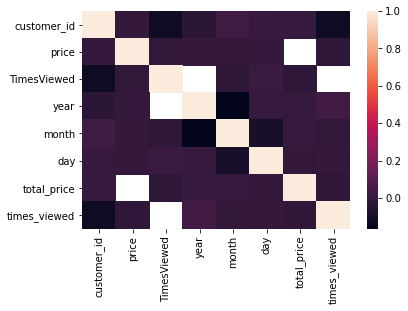

In [14]:
sns.heatmap(df.corr())

The above table shows that there is a heavy positive corelation between the price and the number of timesViewed

#### Number of streams coming in from different countries

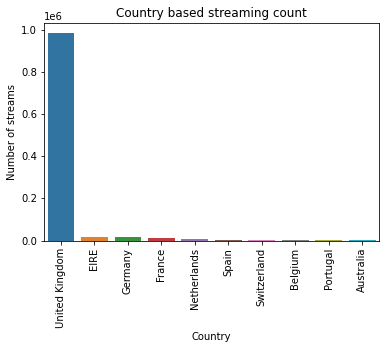

In [37]:
sns.barplot(x=countryCounts.index, y=countryCounts.values)

plt.xticks(rotation=90)
plt.title("Country based streaming count")
plt.ylabel("Number of streams")
plt.xlabel("Country")
plt.show()

UK seems to be the major consumer of products with a large number of streams coming in from the country

#### Revenue in different years

Text(0, 0.5, 'Price')

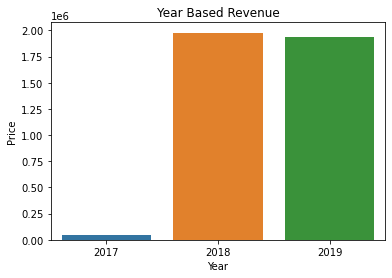

In [50]:
yearPriceDf = pd.pivot_table(df, index="year", values=["price"], aggfunc="sum").reset_index()

sns.barplot(x="year", y="price", data=yearPriceDf)

plt.title("Year Based Revenue")
plt.xlabel("Year")
plt.ylabel("Price")

There is a huge jump in revenues from 2017 to 2018

#### Country based Revenue

Text(0, 0.5, 'Revenue')

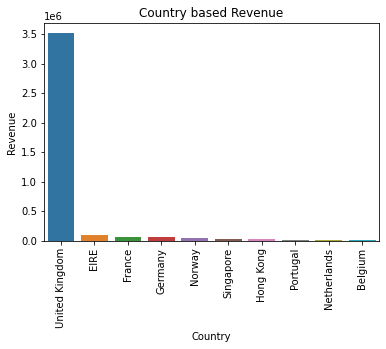

In [66]:
countryPriceDf = pd.pivot_table(df, index="country", values=["price"], aggfunc="sum") \
                                .reset_index() \
                                .sort_values(by="price", ascending=False) \
                                .iloc[:10]

sns.barplot(x="country", y="price", data=countryPriceDf)
plt.title("Country based Revenue")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Revenue")

UK as expected also provides the maximum amount of revenue for the company